【問題1】データセットの取得

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("train_1.csv")
print(df)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

問題2】データセット自体の調査

アイオワ州エイムズの住宅の（ほぼ）すべての要項を示す『79』の説明変数を使用して、各住宅の最終価格を予測するデータセットになります。

【問題3】データの確認

各特徴量がどういったものかを見る

LotArea(数値データ)

In [2]:
df.loc[:1459,["LotArea"]]

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


Neighborhood(文字データ)

In [3]:
df.loc[:1459,["Neighborhood"]]

,Neighborhood
0,CollgCr
1,Veenker
2,CollgCr
3,Crawfor
4,NoRidge
...,...
1455,Gilbert
1456,NWAmes
1457,Crawfor
1458,NAmes


MSSubClass(数値データ)

In [4]:
df.loc[:1459,["MSSubClass"]]

,MSSubClass
0,60
1,20
2,60
3,70
4,60
...,...
1455,60
1456,20
1457,70
1458,20


今回の目的変数はどの列か確認する

In [5]:
df.loc[:1459,["SalePrice"]]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


特徴量の平均値と標準偏差、四分位数を一度に表示させる

In [6]:
df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


【問題4】欠損値への対応

各特徴量の欠損値の有無を確認する

<AxesSubplot:>

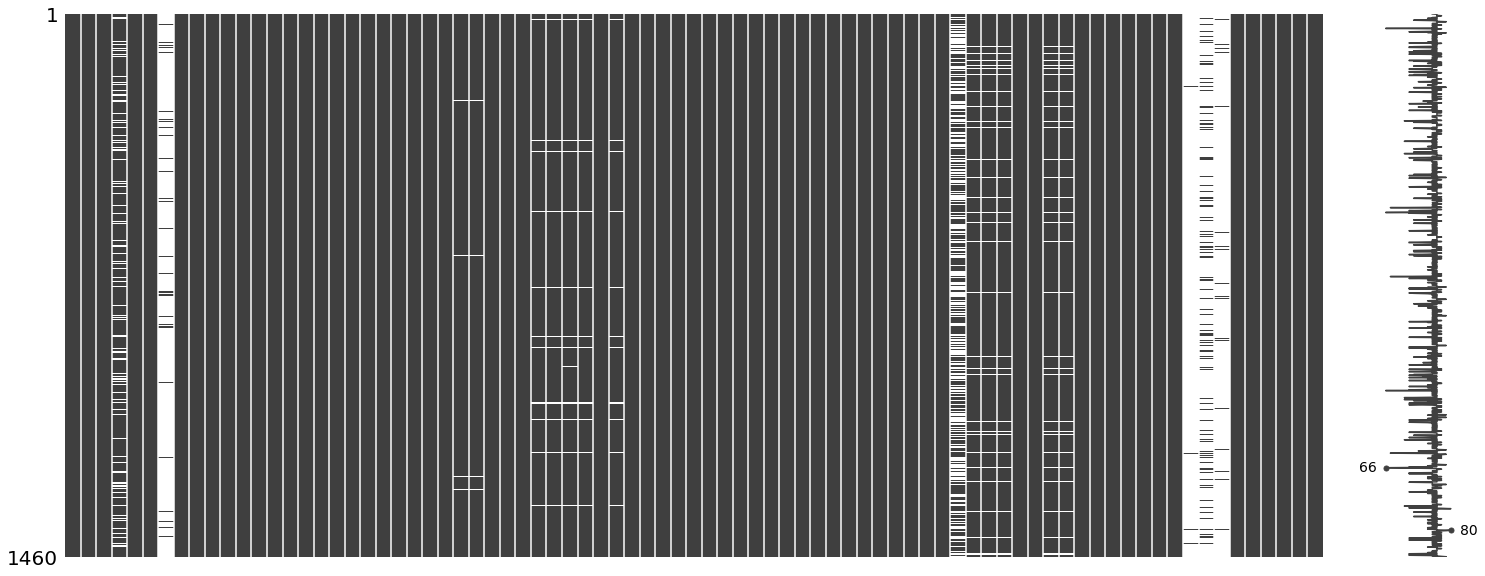

In [7]:
import missingno as msno
msno.matrix(df)

欠損値が何パーセント含まれるかを確認する

In [8]:
print("欠損値は{:.2f}％、含まれています。".format(df.isnull().values.sum()/df.count().sum()*100))
print(df.count().sum())
print(df.isnull().values.sum())

欠損値は6.26％、含まれています。
111295
6965


5つ以上欠損値がある特徴量（列）は削除する

In [9]:
df_1 = df.dropna(thresh=1455,axis=1)
df_1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する

In [10]:
df_2 = df_1.dropna(how ="any")
df_2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

尖度

確率変数の確率密度関数や頻度分布の鋭さを表す指標である。正規分布と比べて、尖度が大きければ鋭いピークと長く太い裾をもった分布であり、尖度が小さければより丸みがかったピークと短く細い尾をもつ分布である

歪度

分布の非対称性を示す指標である。分布の尖り（とがり）具合を示す指標である尖度とともに用いる。歪みをもち、尖度が大きい金融データなどではこれらの指標を頻繁に用いる。

【問題6】分布の確認

seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

尖度は6.5293です。
歪度は1.8819です。


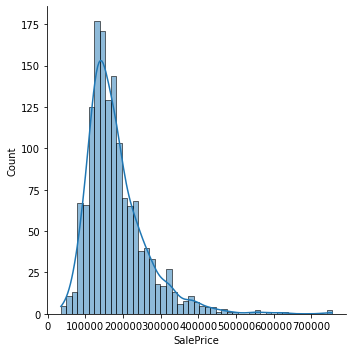

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.displot(df_2["SalePrice"],kde = True)

kurt = df_2["SalePrice"].kurt()
print("尖度は{:.4f}です。".format(kurt))
skew = df_2["SalePrice"].skew()
print("歪度は{:.4f}です。".format(skew))

目的変数に対して対数変換を行う

In [12]:
df_a = df_2["SalePrice"]
df_b = df_a.apply(np.log)
print(df_b)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64


対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

尖度は0.8069です。
歪度は0.1213です。


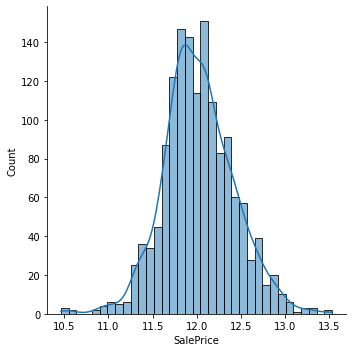

In [13]:
sns.displot(df_b,kde = True)

kurt_b = df_b.kurt()
print("尖度は{:.4f}です。".format(kurt_b))
skew_b = df_b.skew()
print("歪度は{:.4f}です。".format(skew_b))

説明

目的変数のままの分布図ではグラフに偏りがあったが、対数返還を行う事により、分布図が正規分布図に修正された。

【問題7】相関係数の確認

相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

<AxesSubplot:>

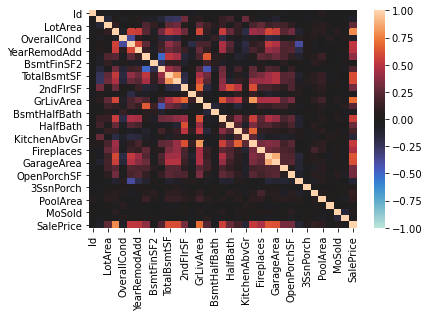

In [14]:
df_corr = df_2.corr()
#print(df_corr)
sns.heatmap(df_corr,vmax=1,vmin=-1,center=0)

TotalBsmtSFと1stFlrSFや 2ndFlrSFが相関性が高い事が見受けられる。 

目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

              OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  BsmtFinSF1  \
OverallQual      1.000000   0.573334      0.551605     0.537523    0.239265   
YearBuilt        0.573334   1.000000      0.592512     0.393159    0.250465   
YearRemodAdd     0.551605   0.592512      1.000000     0.292546    0.129259   
TotalBsmtSF      0.537523   0.393159      0.292546     1.000000    0.521963   
BsmtFinSF1       0.239265   0.250465      0.129259     0.521963    1.000000   
GrLivArea        0.593021   0.199286      0.287677     0.455001    0.208088   
FullBath         0.551267   0.467960      0.438733     0.324886    0.059102   
TotRmsAbvGrd     0.427720   0.095401      0.191603     0.286125    0.044529   
GarageCars       0.600991   0.537866      0.420573     0.435279    0.224342   
GarageArea       0.561980   0.479460      0.372012     0.486719    0.296851   

              GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
OverallQual    0.593021  0.551267      0.427720    0.600

<AxesSubplot:>

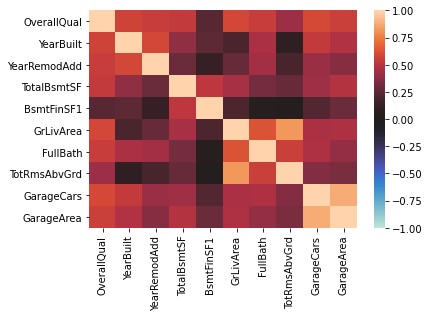

In [15]:
df_corr2 = df_2.filter(items=["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","BsmtFinSF1","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]).corr() 
print(df_corr2)
sns.heatmap(df_corr2,vmax=1,vmin=-1,center=0)

目的変数と相関の高い特徴項目は総じてお互い標準以上の関係性が見受けられた。

選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

選考した特徴の項目は、大きく分けると『家の状態』、『地下室のスペック』、『各部屋のグレード』、『ガレージのスペック』となり、互いに大きく関わっていることが見受けられた。
立地条件などよりも重視されている事にも注目すべきだと思われる。

選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す

GrLivAreaとTotRmsAbvGrd 

GarageCarsとGarageArea

GrLivAreaとFullBath 